# Battery Charge Time
## NVDC Notebook Architecture
#### For the duration of the charging period, the instantaneous battery current will depend on the state of the whole system, which consists of:


*   Adaptor power rating - minus efficiency losses in the charger power train.
*   Charger max current - a new control loop which will protect the charger and inductor. 
*   System load - adds to charger load and can reduce available charging current. If Psys > Padaptor, then Ibattery will be < 0
*   Battery voltage - directly impacts System Voltage in the NVDC architecture. Also, for LiPO batteries, Vbat is current dependent. 
*   Battery current - raises System Voltage through the voltage drop across battery charge path resistence

In [16]:
import batterycharger as bc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
plt.style.use('seaborn')
from IPython.display import Image




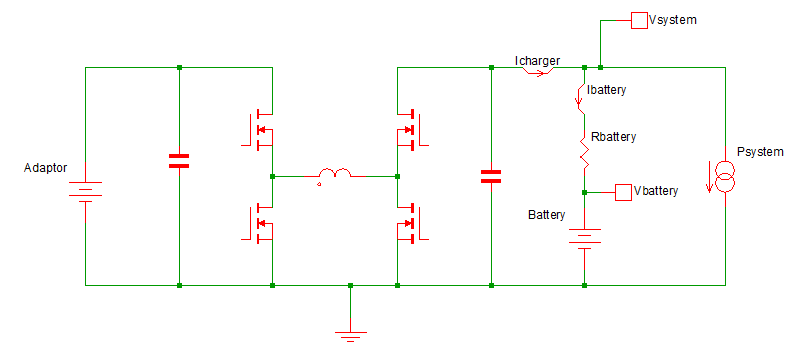

In [17]:
Image('NVDC_charger.PNG', width=800)

### Initial State of Charge

In [4]:
soc=0.01

### Inputs and Results

In [8]:
def nvdc_system(padaptor,psystem,ichargermax):
    data=bc.batterystate_vs_t(bc.Charger(bc.Adapter(power=padaptor),bc.Battery(soc=soc),psystem=psystem, imax=ichargermax))
    chargetime = str(data[0][-1])+'hrs'
    df=pd.DataFrame(np.array(data[1:]).T,index=data[0],columns=['SOC  Chargetime: '+chargetime,'pout','vbat','vsys','iout','icharge'])
    df.index.name='time(hr)'
    df.plot(subplots=True, layout=(3,2),figsize=(10,10),sharex=False,use_index=True)

interact(nvdc_system,padaptor=[45,60,90],psystem=(0,60,5),ichargermax=(6, 9, 0.5));


interactive(children=(Dropdown(description='padaptor', options=(45, 60, 90), value=45), IntSlider(value=30, de…